In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Loading the Data

* dataset source: https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries 

In [2]:
df_full = pd.read_csv('Levels_Fyi_Salary_Data.csv', parse_dates=['timestamp'])
print(df_full.shape)
df_full.sample(5).T

(62642, 29)


,41840,15680,51181,13208,26502
timestamp,2021-02-11 20:57:46,2020-01-27 13:44:52,2021-05-11 20:23:15,2019-11-19 02:44:32,2020-08-13 20:27:44
company,Google,SAS Institute,Tata Consultancy Services,Microsoft,Amazon
level,L3,Staff,Assistant Consultant,SDE,L6 SDM
title,Software Engineer,Solution Architect,Solution Architect,Software Engineer,Software Engineering Manager
totalyearlycompensation,250000,127000,116000,170000,364000
location,"Mountain View, CA","Raleigh, NC","Toronto, ON, Canada","Seattle, WA","Washington, DC"
yearsofexperience,2.0,2.0,15.0,0.0,10.0
yearsatcompany,1.0,1.0,5.0,0.0,0.0
tag,API Development (Back-End),ML / AI,API Development (Back-End),Mobile (iOS + Android),Full Stack
basesalary,137000.0,102000.0,106000.0,125000.0,155000.0


* Timestamp: When the data was recorded.

* Company: Company.

* level: What level the observation is at.

* title: Role title.

* totalyearlycompensation: Total yearly compensation.

* location: Job location.

* yearsofexperience: Years of Experience.

* yearsatcompany: Years of experience at said company.

* tag: tag

* basesalary: Base salary

* stockgrantvalue: Stock grant value.

* bonus: Bonus

* gender: Gender
* otherdetails: Other details. Free form text field.
* cityid: City ID
* dmaid: dmaid
* rowNumber: Row number.
* Masters_Degree: 1 if yes, 0 if not
* Bachelors_Degree: 1 if yes, 0 if not
* Doctorate_Degree: 1 if yes, 0 if not
* Highschool: 1 if yes, 0 if not
* Some_College: 1 if yes, 0 if not
* Race_Asian: 1 if yes, 0 if not
* Race_White: 1 if yes, 0 if not
* Race_Two_Or_More: 1 if yes, 0 if not
* Race_Black: 1 if yes, 0 if not
* Race_Hispanic: 1 if yes, 0 if not
* Race: Race as a factor column.
* Education: Education as a factor column.

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  float64       
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [4]:
df_full.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Data Preprocessing

In [81]:
# we leave a holdout set, not to open until finishing the modeling
from sklearn.model_selection import train_test_split

df, test_df = train_test_split(df_full, test_size=0.2, random_state=42)

In [82]:
# remove not useful columns
df = df.drop(columns = ['cityid', 'dmaid', 'rowNumber'], errors='ignore') # we drop IDs
print(len(df.otherdetails.drop_duplicates()))

# the column "otherdetails" has 10K+ different values and would require NLP to be used as a feature
# Will leave it out of the analysis for this time

df = df.drop(columns= ['otherdetails'], errors='ignore')

10685


In [83]:
df = df[['timestamp','company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education']]

df.shape # our real dataset consists of 14 features and 1 target variable

(50113, 15)


### 2.2. Column-by-column preprocessing approach

#### Selecting the target variable

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalyearlycompensation'>

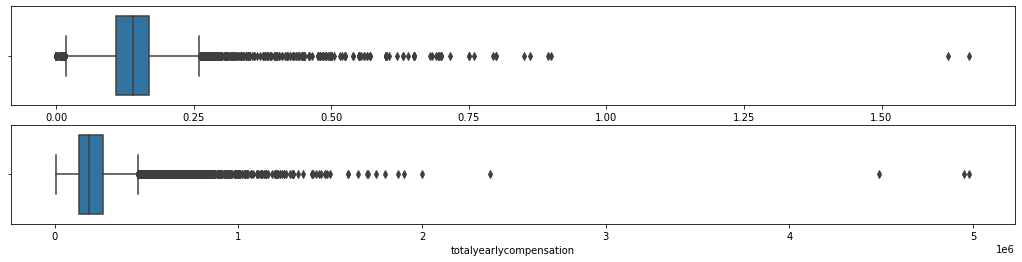

In [84]:
import seaborn as sns 
fig, ax = plt.subplots( nrows = 2, figsize = (18,4) )  

sns.boxplot( df.basesalary, ax = ax[0] )

sns.boxplot( df.totalyearlycompensation, ax = ax[1] ,)

Both **"salary"** and **"totalcompensation"** are fairly skewed distributions with plenty of outliers. The latter one seems even more affected by outliers (think how stock options and bonus deals can drastically affect a final compensation). Therefore I choose **salary** as the main target variable I will work with

In [85]:
df.corr()['basesalary']

totalyearlycompensation    0.672887
yearsofexperience          0.372450
yearsatcompany             0.145297
basesalary                 1.000000
stockgrantvalue            0.471974
bonus                      0.390428
Name: basesalary, dtype: float64

In [86]:
df = df.drop(columns = ['totalyearlycompensation', 'stockgrantvalue', 'bonus'])

"stockgrantvalue" and "totalyearlycompensation" both have high correlation with base salary, but in reality we shouldn't use this columns because they won't be available once we want to predict for a new position. These columns are invalid for a predictive model so I'll need to remove them

In [87]:
# I remove very low salary values which could be results of failed scraping, and very high values (2% of outliers)
df = df[df.basesalary > 10 ]
q98 = np.quantile(df.basesalary,0.98)
print(q98)
df.loc[ df.basesalary >q98 , 'basesalary'] =q98

252000.0


#### Solving Nulls

In [88]:
df.isna().sum()

timestamp                0
company                  5
level                   98
title                    0
location                 0
yearsofexperience        0
yearsatcompany           0
tag                    621
basesalary               0
gender               14584
Race                 30359
Education            23954
dtype: int64

In [89]:
df = df.dropna(subset = ['level', 'tag', 'company'])
df.isna().sum()
# we drop rows in columns which NAs are very few and so dropping the whole row doesn't remove that much information from the data

# we will worry about gender, race and education, later.

timestamp                0
company                  0
level                    0
title                    0
location                 0
yearsofexperience        0
yearsatcompany           0
tag                      0
basesalary               0
gender               14198
Race                 29703
Education            23313
dtype: int64

#### Timestamp

In [90]:
# the timestamp of recording a job posting is probably not relevant. Let's confirm

df['timestamp_year'] = df.timestamp.dt.year
df['timestamp_month'] = df.timestamp.dt.month
df['timestamp_day'] = df.timestamp.dt.day

time_columns = ['timestamp_year' , 'timestamp_month' ,'timestamp_day' ]

import statsmodels.api as sm

mod = sm.OLS( df.basesalary, df[time_columns])

res = mod.fit()

print(res.summary())

# it actually seems to be informative so let's keep it

                                 OLS Regression Results                                
Dep. Variable:             basesalary   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          1.295e+05
Date:                Tue, 18 Jan 2022   Prob (F-statistic):                        0.00
Time:                        09:27:49   Log-Likelihood:                     -5.8044e+05
No. Observations:               47505   AIC:                                  1.161e+06
Df Residuals:                   47502   BIC:                                  1.161e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [91]:
# new variable keeping only date and assigning it a ranking based on chronology
df['datestamp']= df.timestamp.dt.date

df_timestamp = df.datestamp.drop_duplicates().sort_values().reset_index().reset_index()[['level_0','datestamp']]

df = df.merge(df_timestamp).rename(columns = {'level_0': 'date_rank'})

del df['datestamp']
del df['timestamp']


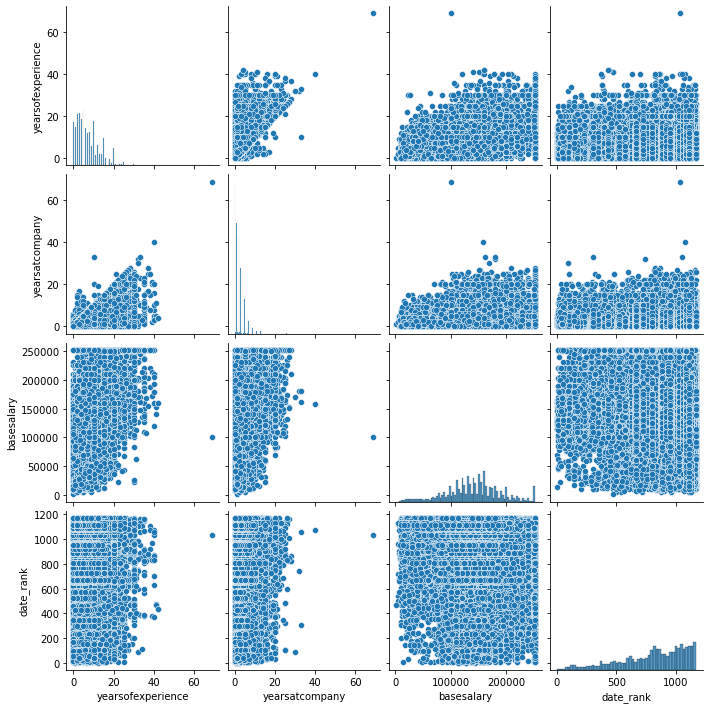

In [82]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# similar to the pandas function seen in the notebook. I prefer to stick to seaborn for visualization
atb = [ 'yearsofexperience','yearsatcompany', 'basesalary', 'date_rank']
sns.pairplot(df[atb].iloc[:,:4], )

### 2.3. Categorical variables encoding

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02


In [92]:
cat_feats = ['company', 'level', 'title', 'location', 'tag', 'gender', 'Race', 'Education']

In [93]:
df[cat_feats].describe().T.sort_values('unique')

,count,unique,top,freq
gender,33307,4,Male,27550
Race,17802,5,Asian,9352
Education,24192,5,Master's Degree,12300
title,47505,15,Software Engineer,31134
location,47505,949,"Seattle, WA",6449
company,47505,1528,Amazon,5986
level,47505,2499,L4,3789
tag,47505,2570,Full Stack,8748


Let's start with the easier ones with less cardinality in the labels and more suited for simple encodings as OneHot
#### Gender, Race and Education

In [94]:
df.gender.value_counts(dropna=False)

df.loc[ df.gender == 'Title: Senior Software Engineer', 'gender'] = 'Unavailable'
df.gender = df.gender.fillna('Unavailable')
#pd.get_dummies(df.gender)


<AxesSubplot:xlabel='gender', ylabel='basesalary'>

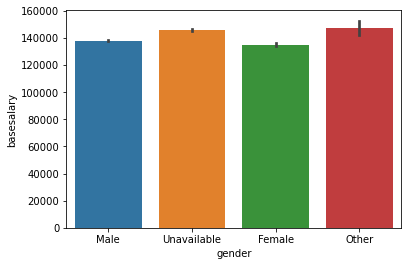

In [95]:
sns.barplot(x = df.gender, y = df.basesalary)

<AxesSubplot:xlabel='Race', ylabel='basesalary'>

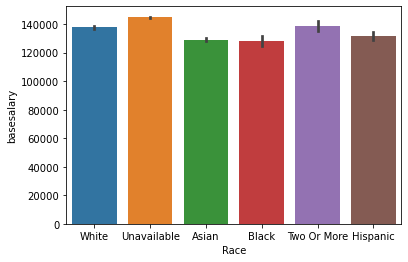

In [96]:
df.Race.value_counts(dropna=False)
df.Race = df.Race.fillna('Unavailable')
#pd.get_dummies(df.Race)


sns.barplot(x = df.Race, y = df.basesalary)

<AxesSubplot:xlabel='Race', ylabel='basesalary'>

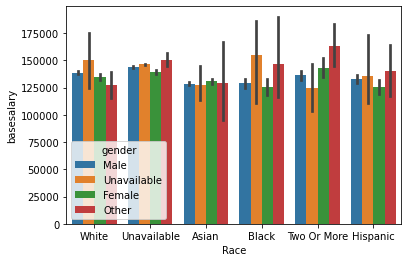

In [97]:
sns.barplot(x = 'Race', hue =  'gender', y = 'basesalary', data = df)

In [98]:
df.Education.value_counts(dropna=False)
df.Education = df.Education.fillna('Unavailable')


<AxesSubplot:xlabel='Education', ylabel='basesalary'>

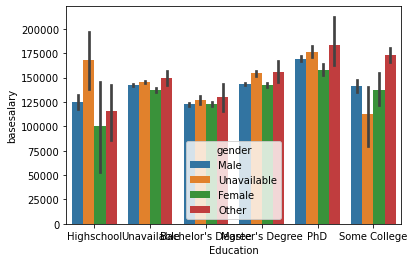

In [99]:
sns.barplot(x = 'Education', hue =  'gender', y = 'basesalary', data = df)

In [100]:
df = df.join(pd.get_dummies(df[['gender', 'Race', 'Education']], drop_first=True ) )

### Title

<AxesSubplot:xlabel='basesalary', ylabel='title'>

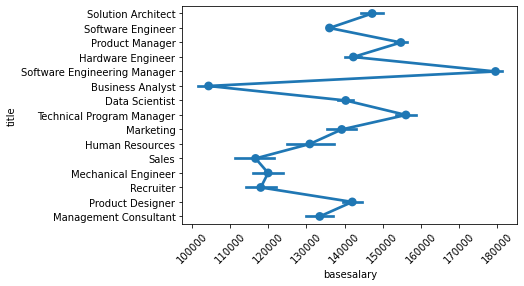

In [101]:
#fig,ax = plt.subplots()
plt.xticks(rotation=45)

sns.pointplot(data=df, y = 'title', x = 'basesalary')

In [102]:
df = df.join(pd.get_dummies(df.title, drop_first=True))

### Level

In [103]:
#df.level.value_counts(normalize=True).head(20)

df_level = df.groupby('level')['basesalary'].median().reset_index()
df_level.columns = ['level', 'level_avg_salary']

df = df.merge(df_level)

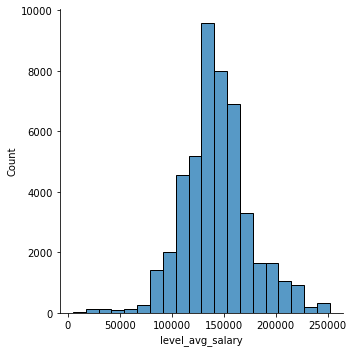

In [104]:
sns.displot(df.level_avg_salary, bins=20)

### Company

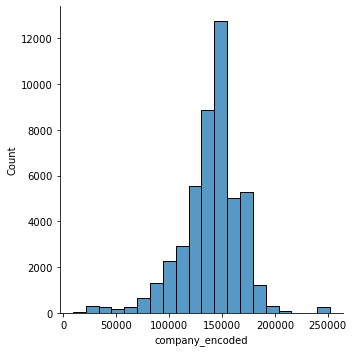

In [105]:
df_company_comp = df.groupby('company')['basesalary'].median().reset_index()
df_company_comp.columns = ['company', 'company_encoded']

df = df.merge(df_company_comp)

sns.displot(df.company_encoded, bins=20)


### Location

In [106]:
#cities
common_locs = df.value_counts('location').head(10).reset_index().location.to_list()
df = df.join(pd.get_dummies(df.loc[df.location.isin(common_locs), 'location'] ) )
df[common_locs] = df[common_locs].fillna(0)

In [107]:
#countries
df['country'] = df.location.str.split(pat=',').apply(lambda x:x[-1][1:])
df.loc[ df.country.str.len() == 2,'country'] = 'US'
df.country.value_counts().head(6)


US                39916
India              2248
Canada             1355
United Kingdom      912
Germany             461
Singapore           292
Name: country, dtype: int64

In [108]:

#one_hot the common ones
df = df.join(pd.get_dummies(df.country)[['US', 'India', 'Canada', 'United Kingdom', 'Germany']])

<AxesSubplot:xlabel='country', ylabel='basesalary'>

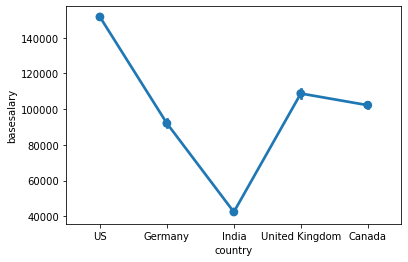

In [109]:
sns.pointplot( data = df[df.country.isin(['US', 'India', 'Canada', 'United Kingdom', 'Germany'])],
              y = 'basesalary', x = 'country')

### Derived column: calculated metric

In [110]:
df['years_ratio'] = 0
df.loc[ df.yearsofexperience >0 ,'years_ratio'] = df.yearsatcompany/df.yearsofexperience

## 3. Modelling

In [111]:
X = df[['yearsofexperience',
        'years_ratio',
       'yearsatcompany',
        'level_avg_salary',
        'company_encoded',
        'timestamp_month',
      #  'timestamp_day', 
        'timestamp_year', 
      #  'date_rank',
       'gender_Male',  'gender_Other', 'gender_Unavailable', 
        'Race_Black', 'Race_Hispanic', 'Race_Two Or More', 'Race_Unavailable', 'Race_White',
       'Education_Highschool', 'Education_Master\'s Degree', 'Education_PhD',
       'Education_Some College', 'Education_Unavailable',
        
    'Data Scientist',
       'Hardware Engineer', 'Human Resources', 'Management Consultant',
       'Marketing', 'Mechanical Engineer', 'Product Designer',
       'Product Manager', 'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager',
       'US', 'India', 'Canada', 'United Kingdom', 'Germany' # improved a lot by adding countries! 
       ]
       + common_locs
   
      ]

y = df.basesalary

### 3.1. Algorithm benchmarking

In [112]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Lets test from a list of ensemble methods

clf1 = GradientBoostingRegressor(random_state=0)
scores = cross_val_score(clf1, X, y, cv=5, scoring = 'r2')

print(scores)
np.mean(scores)

[0.63667272 0.78061935 0.79411892 0.80647408 0.76970639]


0.7575182926156463

In [38]:
clf2 = RandomForestRegressor(random_state=0)
scores = cross_val_score(clf2, X, y, cv=5, scoring = 'r2')

print(scores)
np.mean(scores)

[0.53419222 0.76226816 0.79037368 0.78843454 0.76847028]


0.7287477751253929

In [38]:
clf3 = AdaBoostRegressor(random_state=0)
scores = cross_val_score(clf3, X, y, cv=5, scoring = 'r2')

print(scores)
np.mean(scores)

[0.51022182 0.65101557 0.6823403  0.66677171 0.59424571]


0.6209190231378041

Comparing the 3 models with default parameters, the gradient boosting regressor is the clear winner. So I'll focus on improving that algorithm for the rest of the notebook.

### 3.2 Hyperparameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
# this cell takes around 4 hours to run in a regular PC.

# param_grid = {'min_samples_split': [2, 100, 500],
#               'max_depth': [3,5,7],
#               'subsample': [0.6, 0.8, 0.9],
#               'n_estimators': [100,500],
#               'learning_rate': [0.1, 0.05]
#              }

# clf1 = GradientBoostingRegressor(random_state=0, )

# grid_search = GridSearchCV(clf1, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs = -1)
# grid_search.fit(X, y)

In [115]:
# grid_search.best_params_

# {'learning_rate': 0.1,
#  'max_depth': 3,
#  'min_samples_split': 2,
#  'n_estimators': 500,
#  'subsample': 0.6}

In [40]:
params = {'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

clf1 = GradientBoostingRegressor(random_state=0, **params )
scores = cross_val_score(clf1, X, y, cv=5, scoring = 'r2')

print(scores)
np.mean(scores)

[0.62602098 0.78054364 0.80782241 0.81062978 0.7976655 ]


0.7645364642256729

In [41]:
y_pred = cross_val_predict(clf1, X, y)
df['y_pred'] = y_pred
df.y_pred = np.around(df.y_pred,0)
df[['y_pred','basesalary']]
df['error'] = df.y_pred - df.basesalary
df['error_abs'] = abs(df.error)
df['error_abs_pct'] = df.error_abs/df.basesalary
df.error_abs_pct.describe()

# 27% mape -- dropped to 15% after adding country information
# MAPE didn't improve more than 1% after hypertuning, not much more to try with params

count    47505.000000
mean         0.151692
std          0.303948
min          0.000006
25%          0.043676
50%          0.095394
75%          0.178951
max         20.114000
Name: error_abs_pct, dtype: float64

### 3.3. A more ethical modeling

In [116]:
X = X[X.columns.difference([ 
    'gender_Male',  'gender_Other', 'gender_Unavailable', 
       'Race_Black', 'Race_Hispanic', 'Race_Two Or More', 'Race_Unavailable', 'Race_White'])]

y = df.basesalary

In [117]:
final_cols = X.columns

In [118]:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor

params = {'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

clf1 = GradientBoostingRegressor(random_state=0, **params )

scores = cross_val_score(clf1, X, y, cv=5, scoring = 'r2')

print(scores)
np.mean(scores)

[0.6261228  0.77674123 0.80570742 0.80837463 0.79639384]


0.7626679833155257

good for STEM jobs and companies. removing race and genre information doesn't affect the predictive power
this can imply that the salary of STEM jobs is not biased by these demographics

In [119]:
# finally we train the model for the last time to use it for validation
final_model = GradientBoostingRegressor(random_state=0, # **params
                                       ).fit(X,y)


In [124]:
df_ft = pd.DataFrame( data = np.stack([ X.columns, final_model.feature_importances_]).T , columns = ['feature', 'importance'])
df_ft.sort_values('importance', ascending=False)

final_cols = df_ft[df_ft.importance > 0.0001].feature.values

In [125]:
final_model = GradientBoostingRegressor(random_state=0, # **params
                                       ).fit(X[final_cols],y)

In [130]:
final_cols

array(['Austin, TX', 'Canada', 'Data Scientist',
       "Education_Master's Degree", 'Education_PhD',
       'Education_Unavailable', 'Human Resources', 'India',
       'Management Consultant', 'Marketing', 'Mountain View, CA',
       'New York, NY', 'Product Manager', 'Recruiter', 'Redmond, WA',
       'Sales', 'San Francisco, CA', 'San Jose, CA', 'Software Engineer',
       'Software Engineering Manager', 'Sunnyvale, CA', 'US',
       'United Kingdom', 'company_encoded', 'level_avg_salary',
       'timestamp_month', 'timestamp_year', 'years_ratio',
       'yearsatcompany', 'yearsofexperience'], dtype=object)

## 4. Testing on the validation set

In [127]:
# remove not useful columns
test_df = test_df[['timestamp','company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education']]

test_df = test_df.drop(columns = ['totalyearlycompensation', 'stockgrantvalue', 'bonus'])

In [128]:
# the timestamp of recording a job posting is probably not relevant. Let's confirm

test_df['timestamp_year'] = test_df.timestamp.dt.year
test_df['timestamp_month'] = test_df.timestamp.dt.month
test_df['timestamp_day'] = test_df.timestamp.dt.day


In [129]:
# new variable keeping only date and assigning it a ranking based on chronology
test_df['datestamp']= test_df.timestamp.dt.date

test_df_timestamp = test_df.datestamp.drop_duplicates().sort_values().reset_index().reset_index()[['level_0','datestamp']]

test_df = test_df.merge(test_df_timestamp).rename(columns = {'level_0': 'date_rank'})

del test_df['datestamp']
del test_df['timestamp']


In [131]:
test_df.loc[ test_df.gender == 'Title: Senior Software Engineer', 'gender'] = 'Unavailable'
test_df.gender = test_df.gender.fillna('Unavailable')

test_df.gender.value_counts()

Male           7198
Unavailable    3890
Female         1368
Other            73
Name: gender, dtype: int64

In [132]:
test_df.Race.value_counts(dropna=False)
test_df.Race = test_df.Race.fillna('Unavailable')
test_df.Race.value_counts(dropna=False)


Unavailable    7969
Asian          2390
White          1638
Hispanic        223
Two Or More     169
Black           140
Name: Race, dtype: int64

In [133]:

test_df.Education.value_counts(dropna=False)
test_df.Education = test_df.Education.fillna('Unavailable')
test_df.Education.value_counts(dropna=False)

Unavailable          6432
Master's Degree      3048
Bachelor's Degree    2539
PhD                   370
Some College           75
Highschool             65
Name: Education, dtype: int64

In [134]:
test_df = test_df.join(pd.get_dummies(test_df[['gender', 'Race', 'Education']], drop_first=True ) )

In [135]:
test_df = test_df.join(pd.get_dummies(test_df.title, drop_first=True))

In [136]:
test_df[['level']].merge(df_level).isna().sum()

level               0
level_avg_salary    0
dtype: int64

In [137]:
#df.level.value_counts(normalize=True).head(20)

# i need to use the statistics from the training set
# df_level = df.groupby('level')['basesalary'].median().reset_index()
# df_level.columns = ['level', 'level_avg_salary']

test_df = test_df.merge(df_level)


# df_company_comp = df.groupby('company')['basesalary'].median().reset_index()
# df_company_comp.columns = ['company', 'company_encoded']

test_df = test_df.merge(df_company_comp)


In [138]:
#cities
#common_locs = test_df.value_counts('location').head(10).reset_index().location.to_list()
test_df = test_df.join(pd.get_dummies(test_df.loc[test_df.location.isin(common_locs), 'location'] ) )
test_df[common_locs] = test_df[common_locs].fillna(0)

#countries
test_df['country'] = test_df.location.str.split(pat=',').apply(lambda x:x[-1][1:])
test_df.loc[ test_df.country.str.len() == 2,'country'] = 'US'


#one_hot the common ones
test_df = test_df.join(pd.get_dummies(test_df.country)[['US', 'India', 'Canada', 'United Kingdom', 'Germany']])

In [139]:
test_df['years_ratio'] = 0
test_df.loc[ test_df.yearsofexperience >0 ,'years_ratio'] = test_df.yearsatcompany/test_df.yearsofexperience

In [142]:
# I remove very low salary values which could be results of failed scraping, and very high values (2% of outliers)
test_df = test_df[test_df.basesalary > 10 ]
#q98 = np.quantile(test_df.basesalary,0.98)
#print(q98)
test_df.loc[ test_df.basesalary >q98 , 'basesalary'] =q98

In [146]:
X = test_df[final_cols]

y = test_df.basesalary
y_pred = final_model.predict(X)

In [147]:
from sklearn.metrics import mean_absolute_percentage_error

In [148]:
mean_absolute_percentage_error(y, y_pred)

0.15046069768294393

In [154]:
y_pred = final_model.predict(X)
test_df['y_pred'] = y_pred
test_df.y_pred = np.around(test_df.y_pred,0)
test_df[['y_pred','basesalary']]
test_df['error'] = test_df.y_pred - test_df.basesalary
test_df['error_abs'] = abs(test_df.error)
test_df['error_abs_pct'] = test_df.error_abs/test_df.basesalary
test_df.error_abs_pct.describe()


count    11659.000000
mean         0.150461
std          0.302322
min          0.000008
25%          0.039000
50%          0.086866
75%          0.168427
max         10.886200
Name: error_abs_pct, dtype: float64

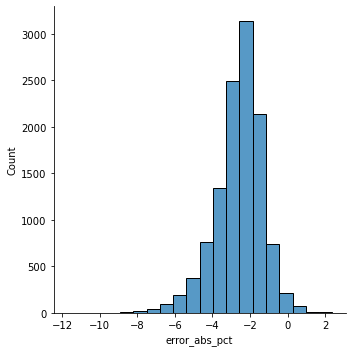

In [157]:
sns.displot(np.log(test_df.error_abs_pct), bins=20)
# error distribution (logarithmic)

In [160]:
test_df['error_decile']=pd.qcut(test_df.error_abs_pct, q=10)

In [163]:
final_cols

array(['Austin, TX', 'Canada', 'Data Scientist',
       "Education_Master's Degree", 'Education_PhD',
       'Education_Unavailable', 'Human Resources', 'India',
       'Management Consultant', 'Marketing', 'Mountain View, CA',
       'New York, NY', 'Product Manager', 'Recruiter', 'Redmond, WA',
       'Sales', 'San Francisco, CA', 'San Jose, CA', 'Software Engineer',
       'Software Engineering Manager', 'Sunnyvale, CA', 'US',
       'United Kingdom', 'company_encoded', 'level_avg_salary',
       'timestamp_month', 'timestamp_year', 'years_ratio',
       'yearsatcompany', 'yearsofexperience'], dtype=object)

In [166]:
test_df.groupby('error_decile').mean()[['US', 'San Francisco, CA', 'company_encoded', 'India', 'Data Scientist', 'timestamp_year']]

,US,"San Francisco, CA",company_encoded,India,Data Scientist,timestamp_year
error_decile,,,,,,
"(-0.00099213, 0.0146]",0.935678,0.121784,146617.066895,0.011149,0.036021,2020.035163
"(0.0146, 0.0299]",0.928816,0.108919,145362.778731,0.024014,0.034305,2020.017153
"(0.0299, 0.0476]",0.930532,0.116638,147099.056604,0.015437,0.027444,2020.029160
"(0.0476, 0.0661]",0.929674,0.101201,144358.061750,0.010292,0.040309,2020.061750
"(0.0661, 0.0869]",0.925386,0.116638,144037.735849,0.018010,0.030875,2020.078045
"(0.0869, 0.112]",0.883262,0.096137,142388.841202,0.030901,0.042918,2020.109871
"(0.112, 0.146]",0.863636,0.108919,141011.578045,0.030875,0.037736,2020.128645
"(0.146, 0.199]",0.831046,0.113208,139166.380789,0.039451,0.045455,2020.150943
"(0.199, 0.3]",0.708405,0.102058,132427.101201,0.084906,0.046312,2020.274443


I like grouping the errors into deciles and see a sorted view of them by comparing some of the features. 

* For example, the table above tells us that the model seem to be more accurate when predicting salaries in the US (top 3 rows have 90%+ predominance of US jobs), and has a hard time when predicting non US jobs (the 10% worst predictions consist of 50% non-US jobs)

* Similarly, the worst performing predictions (last rows) have almost no jobs from San Francisco.

* A similar but opposite story can be told about India.

* Then we also have features, like "Data Scientist" and "timestamp_year" which apparently don't have a clear sorting among error deciles: they all have a constant value among all the rows